# Unpacking SVD

### Introduction

In this lesson, we'll learn some of the linear algebra fundamentals that explains how principal component analysis works.

### Understanding SVD

Singular value decomposision says that any matrix $A$ can be decomposed into three separate matrices.

<img src="https://miro.medium.com/max/1400/1*tmVzY_1k9_JpxyKDkXwAQA.jpeg">

Any matrix can be thought of as rotating and stretching space.  We can see this through the illustration, [courtesy of Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition), below.

<img src="./matrix-transformation.png" width="40%">

Now, what singular value decomposition performs, is to translate these rotation and stretching into three different matrices $USV$, also known as $U \Sigma V$.  The matrix $\Sigma$ is diagonal matrix, responsible for stretching different dimensions of space.  And the matrices $U$ and $V$ are two orthonormal matrices which rotate space.

We can see this illustrated below.

<img src="./svd.png" width="30%">

In the [image below](https://en.wikipedia.org/wiki/Singular_value_decomposition), we can see that original matrix $M$ as performs both a stretch and a rotation of the circle.  Meanwhile, $V\Sigma U$ decomposes this transformation into three steps.  $V$ first rotates the circle, then $\Sigma$ stretches different dimensions of the circle, and finally $U$ performs another rotation.  Together, the transformations performed by $U \Sigma V$ are precisely the same transformations performed by $M$.

### Seeing it in Action

Later, we'll get into how this $SVD$ can help us, and what it has to do with PCA.  But first let's see it in action.

Here, we'll initialize a matrix $A$, and then we'll use SVD to break it down into three different matrices.  Ok, let's initialize our matrix $A$.

In [38]:
import numpy as np
A = np.array([[3, 2, 2], 
              [2, 3, -2],
              [1, 4, 6]
             ])

As we know, we can think of applying a matrix as both a stretch and rotation of space.  And we can use svd to break this down into three matrices that separately perform a rotatation, followed by a stretch, and then another rotation. We do so with the following:

In [115]:
from numpy.linalg import svd

U, S, V = svd(A)
U, S, V

(array([[-0.44598142, -0.3315123 , -0.83138449],
        [-0.11179123, -0.90097181,  0.41922848],
        [-0.88803339,  0.27990961,  0.36475652]]),
 array([8.05000987, 4.39570781, 1.6956102 ]),
 array([[-0.30429281, -0.59372226, -0.74491594],
        [-0.57250642, -0.51102159,  0.64116561],
        [-0.76134243,  0.62157124, -0.18440961]]))

So we're left with these three matrices.  Which are factorizations of our original matrix.  Let's put our pieces together.

In [45]:
from numpy import diag
diag_S = diag(S)
U.dot(diag_S).dot(V)

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.],
       [ 1.,  4.,  6.]])

### Freeze Frame

Ok, now let's verify that these matrices rotate, stretch and rotate the space, just like we asserted.  We can do so by loading up our vector trace.

In [119]:
def vector_trace(vector, name = '', text = ''):
    return {'x': [0, vector[0]], 'y': [0, vector[1]], 
             'mode': 'lines+markers', 'name': name, 'text': text}

And then we can initialize a vector $b$ which we apply $A$ to.

In [120]:
A

array([[ 3,  2,  2],
       [ 2,  3, -2],
       [ 1,  4,  6]])

In [121]:
b = np.array([4, 5, 6])

In [122]:
b_dot_A = b.dot(A)
b_dot_A

array([28, 47, 34])

Let's display how our matrix $A$ transformed $b$.

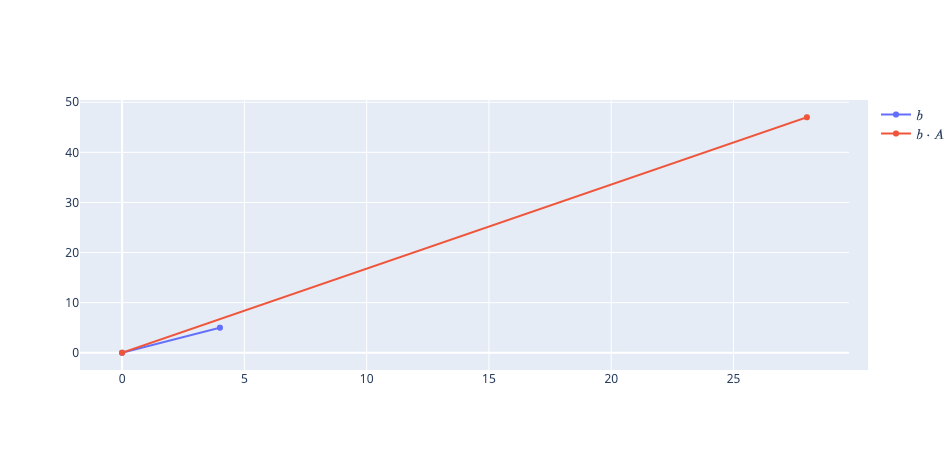

In [123]:
import plotly.graph_objects as go
b_trace = vector_trace(b, name = '$b$')
b_dot_A_trace = vector_trace(b_dot_A, name = '$b \cdot A$')
go.Figure(data = [b_trace, b_dot_A_trace])

So we can definitely see a significant stretch of the matrix, and also a slight rotation.

> Now let's see how SVD breaks these steps down.

In [124]:
rotate = b.dot(U)
stretch = rotate.dot(diag_S)
final_rotation = stretch.dot(V)

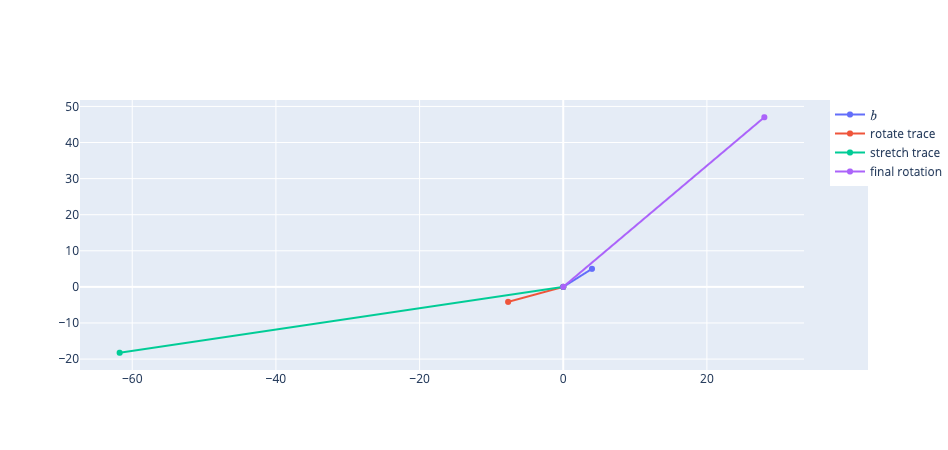

In [125]:
import plotly.graph_objects as go
rotate_trace = vector_trace(rotate, name = 'rotate trace')
stretch_trace = vector_trace(stretch, name = 'stretch trace')
final_rotation_trace = vector_trace(final_rotation, name = 'final rotation')
go.Figure(data = [b_trace, rotate_trace, stretch_trace, final_rotation_trace])

So we can see that these three matrices do in fact perform the steps to rotate, and stretch, and then rotate our vector $b$ again.  Matrix decomposition has been achieved!

### Why it matters

The reason why this is useful is because our whole goal with principal component analysis is to break down our matrix, and somehow retain the components that are useful.  To somehow much of the data in the matrix.  Let's take a look at the three matrices provided by SVD again.

In [65]:
U, diag_S, V

(array([[-0.44598142, -0.3315123 , -0.83138449],
        [-0.11179123, -0.90097181,  0.41922848],
        [-0.88803339,  0.27990961,  0.36475652]]),
 array([[8.05000987, 0.        , 0.        ],
        [0.        , 4.39570781, 0.        ],
        [0.        , 0.        , 1.6956102 ]]),
 array([[-0.30429281, -0.59372226, -0.74491594],
        [-0.57250642, -0.51102159,  0.64116561],
        [-0.76134243,  0.62157124, -0.18440961]]))

Looking at the diagonal matrix S, we can see that the values are ordered from largest to smallest.  This, in fact is always the case.  Now let's think about what it means to multiply these three matrices together.  We can rewrite $USV^T$ as the following: 

$A = U \Sigma V =  \sigma_1 u_1 \cdot v_1^T + \sigma_2  u_2 \cdot v_2^T +  \sigma_3  u_3 \cdot v_3^T $

So we have a series of cross products, each multiplied by a singular values $\sigma$.  Notice that adding these three dot products together brings us back to A.

In [71]:
8.05*U[:, :1].dot(V[:, :1].T) + 4.395*U[:, 1:2].dot(V[:, 1:2].T) + 1.6956102*U[:, 2:3].dot(V[:, 2:3].T)

array([[ 3.00761926,  1.89608714,  2.08766964],
       [ 2.0953212 ,  2.99450952, -1.90722022],
       [ 0.9841705 ,  3.8605498 ,  6.09318889]])

In [72]:
A

array([[ 3,  2,  2],
       [ 2,  3, -2],
       [ 1,  4,  6]])

And the reason why this is useful, is because if we lost one of the vectors, then we still *come close* to reproducing our matrix A.

In [73]:
8.05*U[:, :1].dot(V[:, :1].T) + 4.395*U[:, 1:2].dot(V[:, 1:2].T)

array([[ 1.95750826,  2.79994087,  1.82770668],
       [ 2.62484327,  2.53873818, -1.776133  ],
       [ 1.44488974,  3.46399857,  6.20724345]])

So we can see that we do not perfectly reproduce A, here, but we are able to reduce our dimensions and capture most of the movement in A.

### How much do we lose?

The amount that we lose is purely determined by the size of the singular values.  So above our singular values are:

`8.05000987, 4.39570781, 1.6956102`.  This means that if we just retain two of the vectors or "components" we would retain 88 percent of the information of our original matrix.

In [75]:
(8.05000987 + 4.39570781)/(8.05000987 + 4.39570781 + 1.6956102)

0.8800954044493875

The reason why this is the case is because when we multiply $U \Sigma V$, U and V are orthogonal matrices, meaning that each vector has the same length of 1, and so the amount of contribution of each cross product is purely determined by the size of the singular values.

In [78]:
first_component = 8.05*U[:, :1].dot(V[:, :1].T)
first_component

array([[1.09245696, 2.05538416, 2.73333384],
       [0.27383901, 0.51520964, 0.68514683],
       [2.17528849, 4.09265873, 5.44258481]])

In [79]:
second_component = 4.395*U[:, 1:2].dot(V[:, 1:2].T)
second_component

array([[ 0.8650513 ,  0.74455671, -0.90562717],
       [ 2.35100426,  2.02352854, -2.46127984],
       [-0.73039875, -0.62866016,  0.76465863]])

In [81]:
from numpy.linalg import norm

norm(first_component), norm(second_component)

(8.049999999999999, 4.394999999999996)

So this is useful because it allows us to see tradeoff of only retaining some of the features in the new matrices returned from SVD.

### SVD 

[PCA vs SVD](https://intoli.com/blog/pca-and-svd/)